In [97]:
import pandas as pd

## Exercício 1

In [98]:
fifa = pd.read_csv('fifa19.csv')
print(fifa.shape)
print(len(fifa['Club'].unique()))
fifa.head()

(18207, 89)
652


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [99]:
fifa['Wage'].head(5)

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [100]:
# filtra clubes com mais de 25 jogadores
clubes_25 = fifa.Club.value_counts() >= 25
clubes_25 = clubes_25[clubes_25]
len(clubes_25)

587

In [101]:
# mantem somente quem tem pelo menos 25
ex_1 = fifa.loc[fifa.Club.isin(clubes_25.index)]

In [102]:
# clube com maior overall medio
print(ex_1.groupby('Club')['Overall'].mean().sort_values().head(1))

print(ex_1.groupby('Club')['Overall'].mean().sort_values().tail(1))

Club
Bohemian FC    55.0
Name: Overall, dtype: float64
Club
Juventus    82.28
Name: Overall, dtype: float64


## Exercício 2

In [103]:
# filtra só seleção com pelo menos 20 jogadores
clubes_20 = fifa.Club.value_counts() >= 20
clubes_20 = clubes_20[clubes_20]
ex_2 = fifa.loc[fifa.Club.isin(clubes_20.index)]

# separa os 20 melhores jogadores
ex_2 = ex_2.groupby('Nationality').apply(lambda x: x.nlargest(20, 'Overall')).reset_index(drop=True) 

# verifica o maior overall 
ex_2.groupby('Nationality')['Overall'].mean().sort_values().tail(1)

Nationality
Spain    86.3
Name: Overall, dtype: float64

## Exercício 3

In [104]:
# filtra clubes com mais de 25 jogadores
clubes_25 = fifa.Club.value_counts() > 25
clubes_25 = clubes_25[clubes_25]

# mantem somente quem tem mais de 25
ex_1 = fifa.loc[fifa.Club.isin(clubes_25.index)]

# funcao para tratar campo release clause
def converte_release_clause(value):
    value_2 = value.replace('€','')
    if 'M' in value_2:
        value_2 = value_2.replace('M','')
        return float(value_2)*1000000
    elif 'k' in value_2:
        value_2 = value_2.replace('k','')
        return float(value_2)*1000

# Precisamos preencher os nulos (Ou excluir)
ex_1['Release Clause'].fillna('0',inplace=True)

# cria um campo release clause numerico
ex_1['Release_Clause_Numeric'] = ex_1['Release Clause'].apply(converte_release_clause)
    
# clube com maior overall medio
ex_1.groupby('Club')['Release_Clause_Numeric'].sum().sort_values(ascending=False).head(5)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Club
Real Madrid            1.856900e+09
FC Barcelona           1.813000e+09
Manchester City        1.511100e+09
Atlético Madrid        1.371100e+09
Paris Saint-Germain    1.215400e+09
Name: Release_Clause_Numeric, dtype: float64

## Exercício 4, 5 e 6

In [105]:
# dataset para o exercicio 4
ex_4 = fifa
ex_4[['Wage', 'Weight', 'Release Clause']].isna().sum()

Wage                 0
Weight              48
Release Clause    1564
dtype: int64

In [106]:
ex_4['Release Clause'].fillna('0', inplace=True)  # essa tratativa nao deve ser usada para modelagem!
ex_4[['Wage', 'Weight', 'Release Clause']].isna().sum()

Wage               0
Weight            48
Release Clause     0
dtype: int64

In [107]:
ex_4['Weight'].fillna('0', inplace=True) # essa tratativa nao deve ser usada para modelagem!

In [108]:
def converte_wage(value):
    value_2 = value.replace('€','')
    if 'M' in value_2:
        value_2 = value_2.replace('M','')
        return float(value_2)*1000000
    elif 'K' in value_2:
        value_2 = value_2.replace('K','')
        return float(value_2)*1000

def converte_weight(value):
    value_2 = value.replace('lbs','')
    return float(value_2)

# cria uma release clause numerica (aproveitamos funcao ja criada no exercicio anterior)
ex_4['Release_Clause_Numeric'] = ex_4['Release Clause'].apply(converte_release_clause)

# faz o mesmo para salario e peso
ex_4['Wage_Numeric'] = ex_4['Wage'].apply(converte_wage)
ex_4['Weight_Numeric'] = ex_4['Weight'].apply(converte_weight)

ex_4[['Release_Clause_Numeric','Wage_Numeric','Weight_Numeric']].head(5)

,Release_Clause_Numeric,Wage_Numeric,Weight_Numeric
0,226500000.0,565000.0,159.0
1,127100000.0,405000.0,183.0
2,228100000.0,290000.0,150.0
3,138600000.0,260000.0,168.0
4,196400000.0,355000.0,154.0


In [109]:
# filtra jogadores que valem menos que 15 milhoes e tem no maximo 29 anos
ex_4 = ex_4[(ex_4['Release_Clause_Numeric']<=15000000) & (ex_4['Age'] <= 29)]

# seleciona os melhores jogadores pelo overall
ex_4 = ex_4.sort_values(by='Overall', ascending=False)[['Name','Overall','Release_Clause_Numeric',
                                                       'Weight_Numeric', 'Wage_Numeric', 'Age']].head(11)

ex_4

,Name,Overall,Release_Clause_Numeric,Weight_Numeric,Wage_Numeric,Age
578,M. Campaña,79,14800000.0,165.0,21000.0,29
605,J. Hector,79,15000000.0,165.0,26000.0,28
785,C. Izquierdoz,78,11200000.0,196.0,25000.0,29
817,V. Chiricheş,78,14500000.0,165.0,57000.0,28
852,N. Lodeiro,78,15000000.0,152.0,11000.0,29
893,R. Alessandrini,78,15000000.0,154.0,11000.0,29
1148,B. Oczipka,77,11100000.0,187.0,30000.0,29
1057,Rafael Carioca,77,13600000.0,159.0,54000.0,29
1058,A. McCarthy,77,13800000.0,174.0,37000.0,28
1075,Jordi Masip,77,13200000.0,168.0,17000.0,29


In [110]:
import numpy as np
ex_4['High Price'] = np.where(ex_4['Release_Clause_Numeric']>ex_4['Release_Clause_Numeric'].median(), '1', '0')
ex_4

,Name,Overall,Release_Clause_Numeric,Weight_Numeric,Wage_Numeric,Age,High Price
578,M. Campaña,79,14800000.0,165.0,21000.0,29,1
605,J. Hector,79,15000000.0,165.0,26000.0,28,1
785,C. Izquierdoz,78,11200000.0,196.0,25000.0,29,0
817,V. Chiricheş,78,14500000.0,165.0,57000.0,28,0
852,N. Lodeiro,78,15000000.0,152.0,11000.0,29,1
893,R. Alessandrini,78,15000000.0,154.0,11000.0,29,1
1148,B. Oczipka,77,11100000.0,187.0,30000.0,29,0
1057,Rafael Carioca,77,13600000.0,159.0,54000.0,29,0
1058,A. McCarthy,77,13800000.0,174.0,37000.0,28,0
1075,Jordi Masip,77,13200000.0,168.0,17000.0,29,0


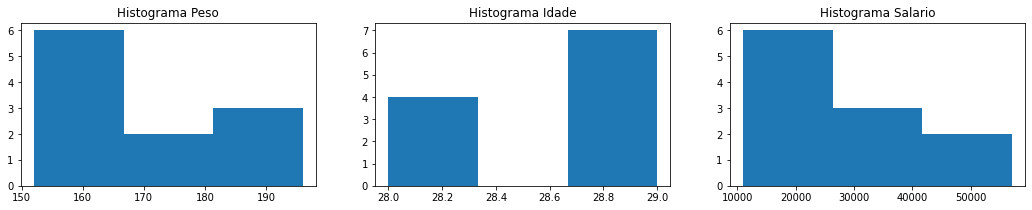

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18,3))


ax[0].hist(ex_4['Weight_Numeric'], bins=3);
ax[0].set_title('Histograma Peso');

ax[1].hist(ex_4['Age'], bins=3);
ax[1].set_title('Histograma Idade');

ax[2].hist(ex_4['Wage_Numeric'], bins=3);
ax[2].set_title('Histograma Salario');

## Exercício 7

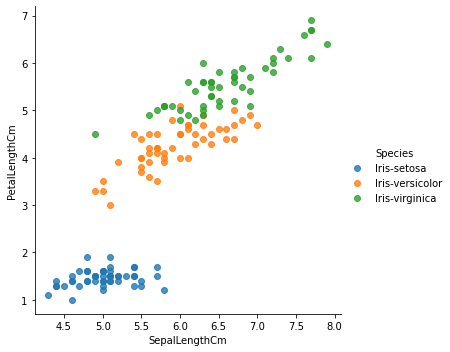

In [112]:
import seaborn as sns

iris = pd.read_csv('iris.csv');
sns.lmplot( x="SepalLengthCm", y="PetalLengthCm", data=iris, hue='Species',fit_reg=False);

## Exercício 8

In [113]:
iris['Species'] = iris['Species'].str.replace('Iris-', '')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [26]:
pd.concat([iris, pd.get_dummies(iris['Species'])], axis=1).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,setosa,1,0,0


## Exercício 9

In [114]:
# cria funcao para converter campo texto yyyy-mm-dd pra data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# carrega arquivos ja transformando a coluna em indice
mglu3 = pd.read_csv('MGLU3.SA.csv',date_parser=dateparse, usecols=['Date','Close', 'Open'], index_col='Date')
lren3 = pd.read_csv('LREN3.SA.csv',date_parser=dateparse, usecols=['Date','Close', 'Open'], index_col='Date')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [115]:
mglu3=mglu3.loc['2016-01-01 00:00:00':'2018-12-31 23:59:59']
lren3=lren3.loc['2016-01-01 00:00:00':'2018-12-31 23:59:59']

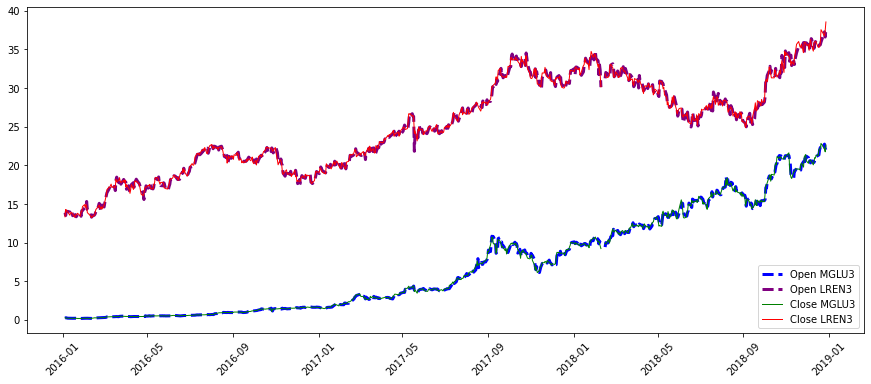

In [141]:
plt.figure(figsize=(15,6));
plt.plot(mglu3['Open'], label='Open MGLU3', ls='dashed', color='blue', linewidth=3);
plt.plot(lren3['Open'], label='Open LREN3', ls='dashed', color='purple', linewidth=3);
plt.plot(mglu3['Close'], label='Close MGLU3', color='green', linewidth=1);
plt.plot(lren3['Close'], label='Close LREN3', color='red', linewidth=1);
plt.legend(loc='lower right');
plt.xticks(rotation=45);

## Exercícios 10, 11, 12

In [36]:
import pandasql as ps

compras = pd.read_csv('COMPRAS.csv', sep=';', decimal=',');
compras.head(5)

,Id,Valor_Compra,Data_Compra
0,TR577,146.86,01/02/2020
1,AB586,487.00,01/02/2020
2,CD687,147.31,09/02/2020
3,TR577,401.10,09/02/2020
4,AA256,386.92,03/03/2020


In [37]:
cadastro = pd.read_csv('CADASTRO.csv', sep=';', decimal=',');
cadastro.head(5)

,Id,Nome,Idade,Estado
0,AA256,Andre,32,AM
1,AB586,Marcos,25,MG
2,CD687,Bruna,20,GO
3,TR577,Diogo,34,GO
4,FS593,Leticia,63,BA


In [38]:
# RESPOSTA 10
query = """select a.Id, a.Idade, a.Estado, sum(b.Valor_Compra) as Gasto_Total 
            from cadastro as a
            left join compras as b
            on a.Id = b.Id
            group by 1,2,3"""

resumo = ps.sqldf(query, locals())
resumo

,Id,Idade,Estado,Gasto_Total
0,AA256,32,AM,1858.83
1,AB586,25,MG,487.00
2,CD687,20,GO,147.31
3,DE568,44,AC,923.97
4,DV468,26,AM,881.88
5,ER999,24,CE,464.50
6,FS593,63,BA,930.43
7,JT587,22,AL,210.27
8,PY684,29,CE,698.64
9,TKH854,19,AC,271.01


In [49]:
resumo.groupby('Estado').agg({'Gasto_Total':['sum','mean','std']})

Gasto_Total                         
               sum         mean         std
Estado                                     
AC         1194.98   597.490000  461.712444
AL          210.27   210.270000         NaN
AM         2740.71  1370.355000  690.807970
BA          930.43   930.430000         NaN
CE         1631.47   543.823333  134.088842
GO         1014.41   507.205000  508.968390
MG          487.00   487.000000         NaN

In [51]:
print(resumo.groupby('Estado')['Gasto_Total'].std(ddof=0))

Estado
AC    326.480000
AL      0.000000
AM    488.475000
BA      0.000000
CE    109.483081
GO    359.895000
MG      0.000000
Name: Gasto_Total, dtype: float64


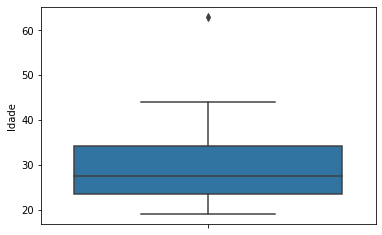

In [39]:
resumo_numeric =  resumo.select_dtypes(include=['int','float'])
sns.boxplot(resumo_numeric['Idade'],orient='v')

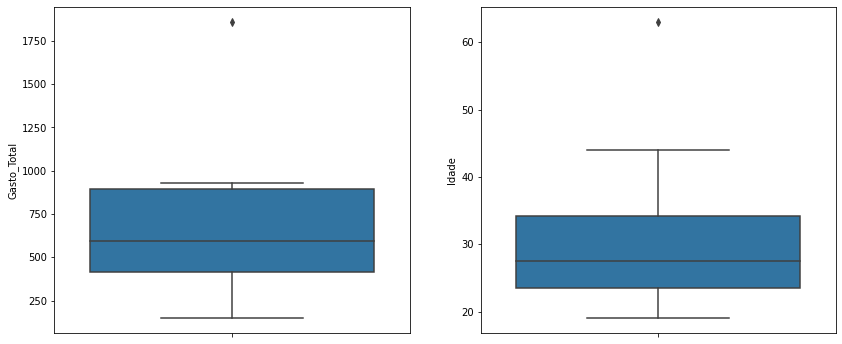

In [40]:
# RESPOSTA 11
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot(resumo_numeric['Gasto_Total'],orient='v', ax=ax1)
sns.boxplot(resumo_numeric['Idade'],orient='v', ax=ax2)

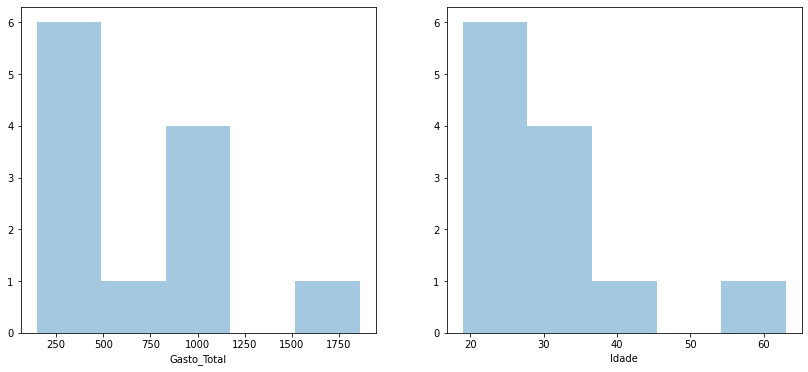

In [41]:
# RESPOSTA 11
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.distplot(resumo_numeric['Gasto_Total'], ax=ax1, kde=False)
sns.distplot(resumo_numeric['Idade'], ax=ax2, kde = False)

In [98]:
# Resposta 12
resumo['jovem'] = np.where(resumo['Idade']<30, 'jovem', 'velho')

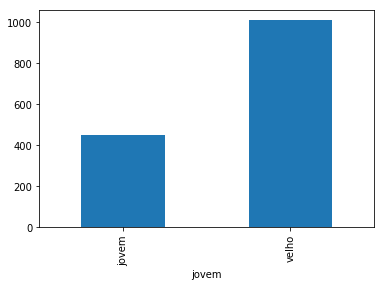

In [99]:
resumo.groupby('jovem')['Gasto_Total'].mean().plot.bar();

## Exercício 13

In [54]:
def exercicio_13(value):
    
    # Parte 1 do exercicio
    list_pares = [2,4,6,8]
    digitos = [int(d) for d in str(value)]
    print('Digitos pares que nao fazem parte do numero passado: '+str(list(set(list_pares) - set(digitos))))
    
    # parte 2 do exercicio
    if value % 2 == 0:
        print("O número é par")
    else:
        print("O número é ímpar")

        
exercicio_13(12345679)
exercicio_13(24680)

Digitos pares que nao fazem parte do numero passado: [8]
O número é ímpar
Digitos pares que nao fazem parte do numero passado: []
O número é par


## Exercício 14

In [55]:
# ALTERNATIVA 1
def remove_duplicidade(string):
    lista = [d for d in string]
    lista_first = [] 
    [lista_first.append(string) for string in lista if string not in lista_first] 
    return lista_first
    
remove_duplicidade('blablabla')

['b', 'l', 'a']

In [56]:
# ALTERNATIVA 2
def remove_duplicidade(string): 
    output="" 
    for i in string: 
        if(i in output): 
            pass
        else: 
            output=output+i 
    
    return output
        

remove_duplicidade("blablabla")

'bla'

## Exercício 15

In [77]:
# Usando nearest-rank: https://en.wikipedia.org/wiki/Percentile
def return_percentile(array,percentile):
    array.sort()
    if (len(array)*percentile) % 2 ==0:
        position = int(len(array)*percentile)
        return array[position]
    elif (len(array)*percentile)-int(len(array)*percentile)>0.5:
        return array[int(len(array)*percentile)+1]
    else:
        return array[int(len(array)*percentile)-1]

print(return_percentile([100,100,102,110,150,100,100,150,120],0.5))
print(return_percentile([1,2,3,4,5,6,7,8,9,10], 0.45))

100
4
